In [21]:

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))


Warning message:
"package 'dplyr' is in use and will not be installed"Warning message:
"package 'readxl' is in use and will not be installed"Warning message:
"package 'ggplot2' is in use and will not be installed"

In [27]:
install.packages("dplyr")
install.packages("readxl")
install.packages("ggplot2")
library(ggplot2)
library(readxl)
library(readxl)

Warning message:
"package 'dplyr' is in use and will not be installed"Warning message:
"package 'readxl' is in use and will not be installed"Warning message:
"package 'ggplot2' is in use and will not be installed"

In [30]:
total_amt <- order_info_r %>% 
group_by(reserv_no) %>% 
summarise(amt_daily = sum(sales/1000)) %>% 
arrange(reserv_no)

total_amt

reserv_no,amt_daily
2019060301,140
2019060601,152
2019060701,48
2019061601,105
2019061801,48
2019062001,10
2019062201,48
2019062601,8
2019062901,54
2019070101,50


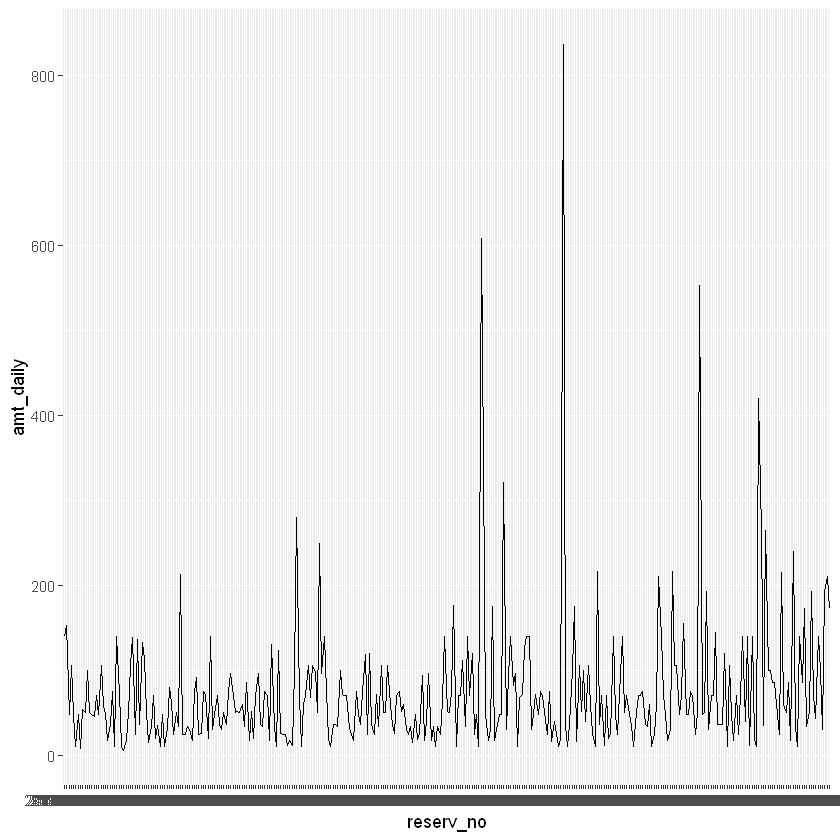

In [31]:
ggplot(total_amt, aes(x=reserv_no, y = amt_daily, group=1)) +geom_line()

In [33]:
total_amt <- order_info_r %>% 
mutate(month = substr(reserv_no, 1, 6)) %>% 
group_by(month) %>% 
summarise(amt_monthly = sum(sales/1000))

total_amt

month,amt_monthly
201906,613
201907,1744
201908,1622
201909,1586
201910,3333
201911,5197
201912,10862


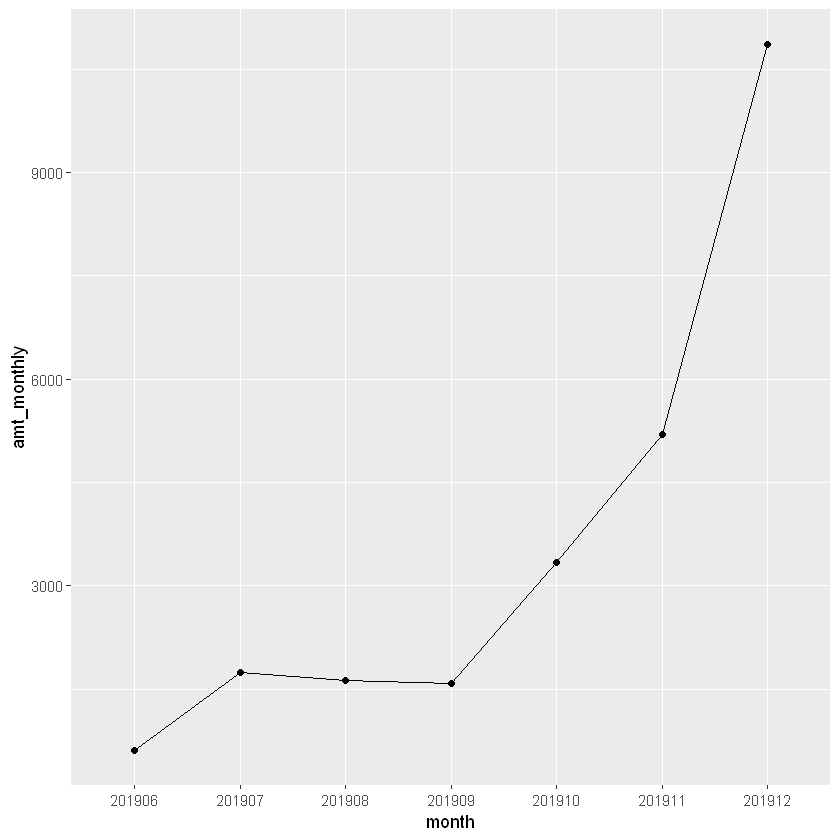

In [34]:
ggplot(total_amt, aes(x=month, y=amt_monthly, group = 1))+
geom_line()+
geom_point()

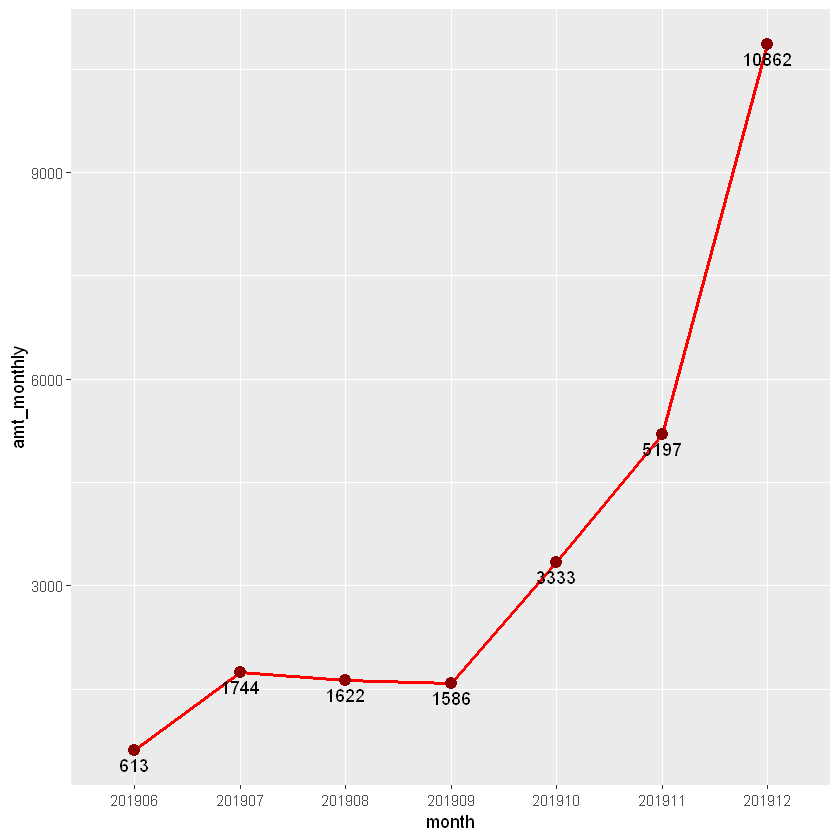

In [35]:
ggplot(total_amt, aes(x=month, y = amt_monthly, group = 1, label = amt_monthly))+
geom_line(color = "red", size = 1)+
geom_point(color = "darkred", size = 3)+
geom_text(vjust = 1.5, hjust = 0.5)

In [36]:
df_boxplot_graph <- inner_join(order_info_r, item_r, by = "item_id")

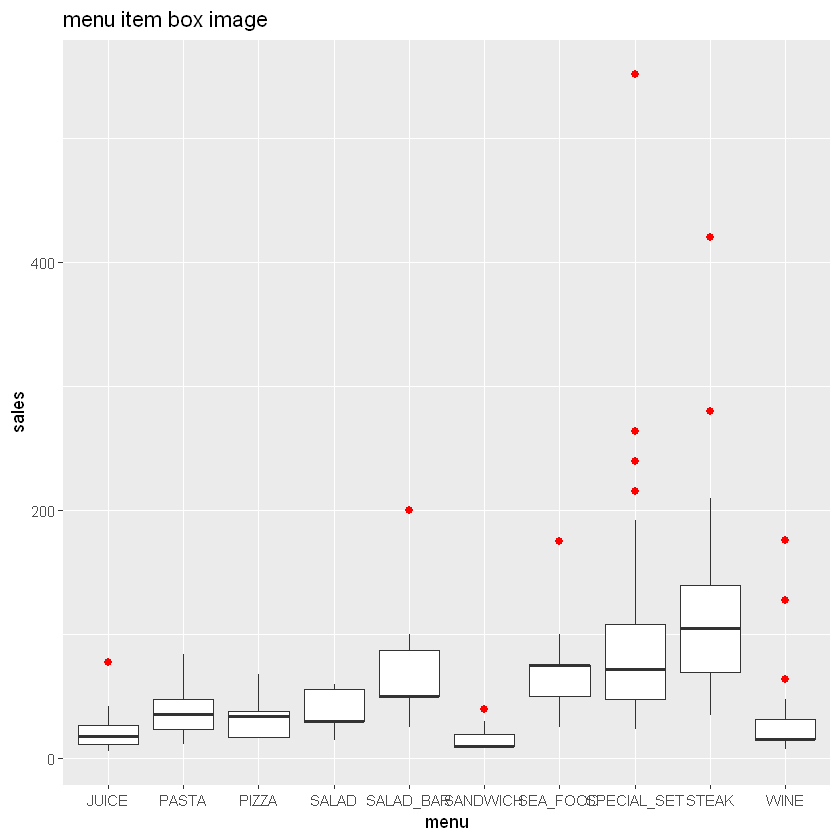

In [38]:
ggplot(df_boxplot_graph, aes(x=product_name, y=sales/1000))+
geom_boxplot(width = 0.8, outlier.size = 2, outlier.color = "red")+
labs(title = "menu item box image", x="menu", y = "sales")

In [40]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


In [43]:
tail(ToothGrowth)

,len,supp,dose
55,24.8,OJ,2
56,30.9,OJ,2
57,26.4,OJ,2
58,27.3,OJ,2
59,29.4,OJ,2
60,23.0,OJ,2


In [46]:
df <- ToothGrowth %>% 
        group_by(dose) %>%
        summarise(sd=sd(len), len=mean(len))

group_by(dose) %>%  투여량별로 그룹화

sd 표준편차, 평균

In [47]:
df

dose,sd,len
0.5,4.499763,10.605
1.0,4.415436,19.735
2.0,3.774150,26.100


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

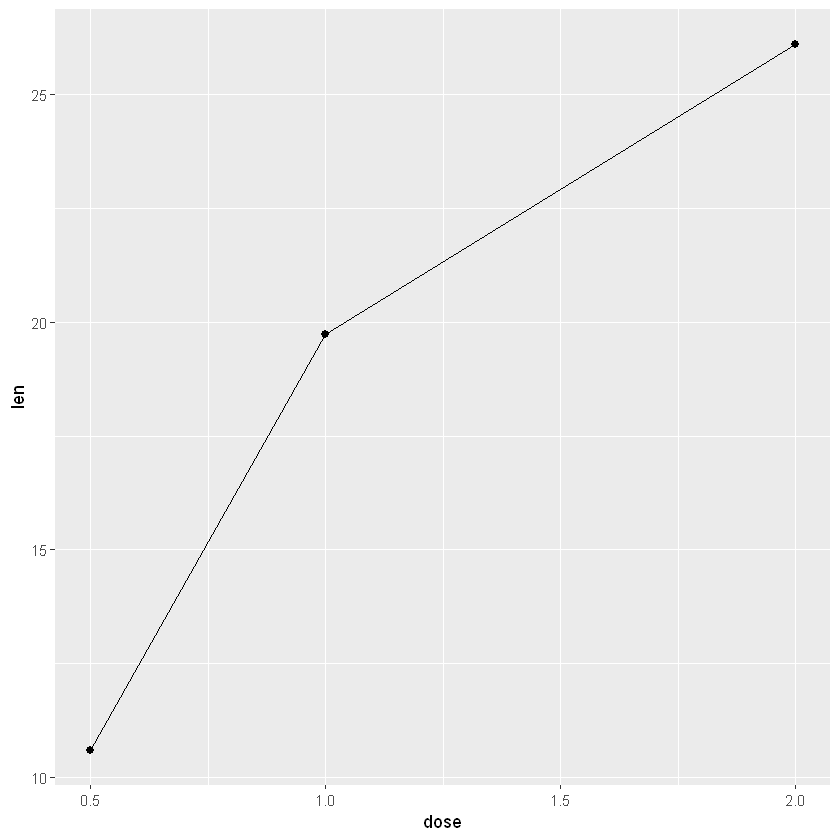

In [52]:
ggplot(df,aes(dose, len))+  #x축 y축 생략가능
geom_line(aes(group=1)) +
geom_point(size=2)

#geom_line 그래프를 그릴 때는 반드시 group을 지정해야 한다. 1개의 줄이라도

In [53]:
df2 <- ToothGrowth %>% 
        group_by(dose, supp) %>%
        summarise(sd=sd(len), len=mean(len))

`summarise()` has grouped output by 'dose'. You can override using the `.groups` argument.


In [54]:
df2

dose,supp,sd,len
0.5,OJ,4.459709,13.23
0.5,VC,2.746634,7.98
1.0,OJ,3.910953,22.70
1.0,VC,2.515309,16.77
2.0,OJ,2.655058,26.06
2.0,VC,4.797731,26.14


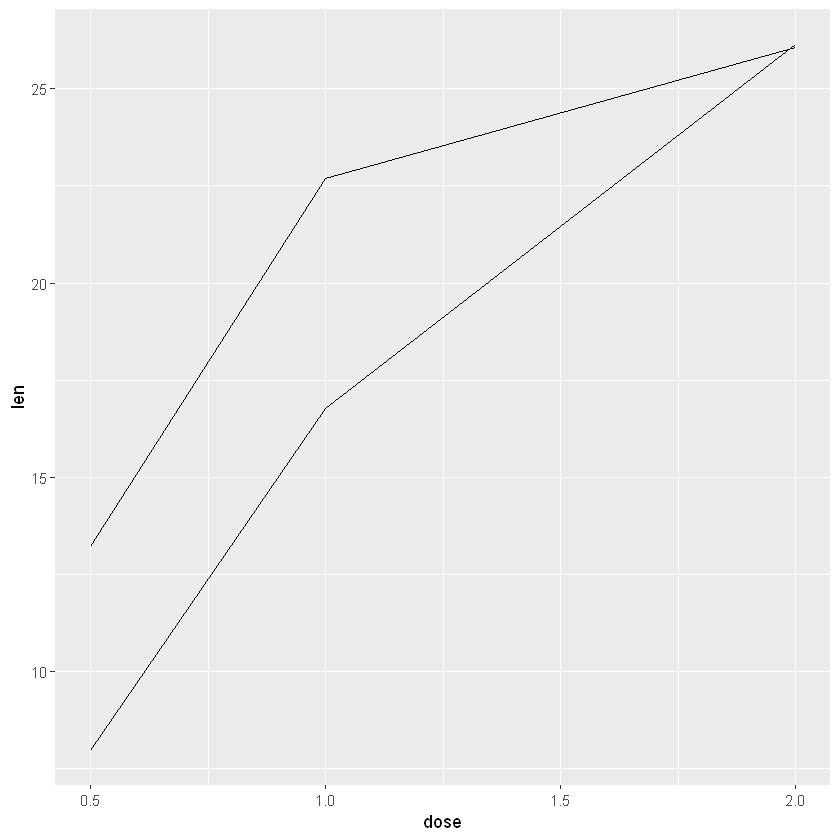

In [58]:
ggplot(df2, aes(dose, len))+
geom_line(aes(group=supp))

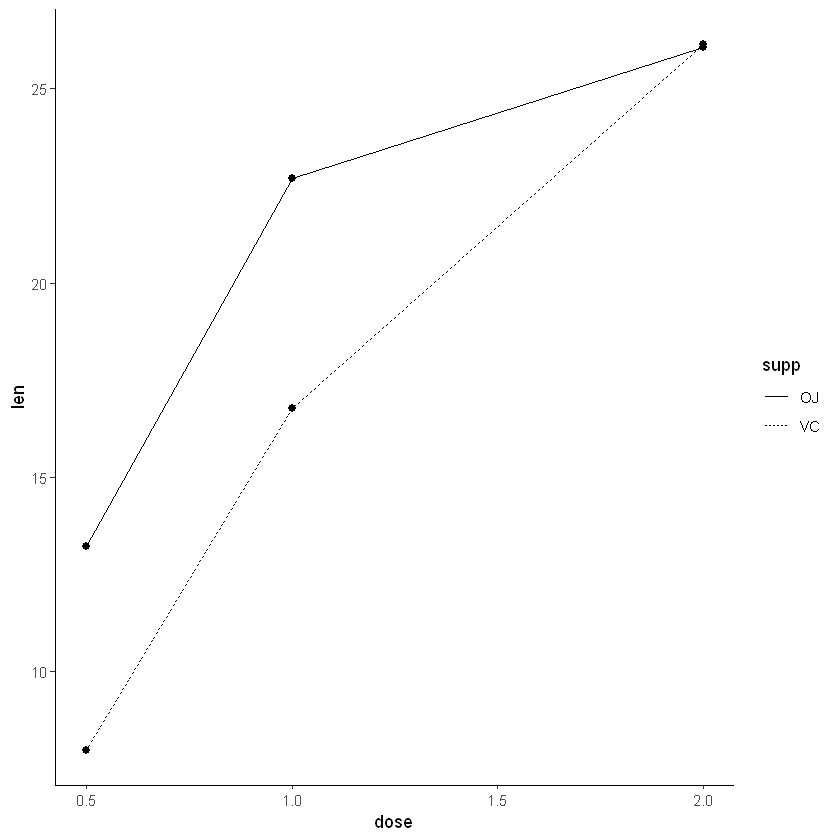

In [62]:
ggplot(df2, aes(dose, len))+
geom_line(aes(group=supp,linetype=supp))+
geom_point(size=2)+
theme_classic()

In [65]:
df_boxplot_graph <- inner_join(order_info_r, item_r, by = "item_id")

In [66]:
df_boxplot_graph

order_no,item_id,reserv_no,quantity,sales,product_name,product_desc,category_id,price
191228137840110010,M0003,2019122805,1,17000,PIZZA,<U+D53C><U+C790>,FOOD,17000
191228137837810010,M0001,2019122806,10,240000,SPECIAL_SET,<U+C628><U+B77C><U+C778>_<U+C804><U+C6A9><U+C0C1><U+D488>,COMBO,24000
191228547385810010,M0003,2019122807,2,34000,PIZZA,<U+D53C><U+C790>,FOOD,17000
191228567831310010,M0008,2019122808,1,10000,SANDWICH,<U+C0CC><U+B4DC><U+C704><U+CE58>,FOOD,10000
191228567430310010,M0005,2019122809,4,140000,STEAK,<U+C2A4><U+D14C><U+C774><U+D06C>,FOOD,35000
191228137860010010,M0005,2019122810,2,70000,STEAK,<U+C2A4><U+D14C><U+C774><U+D06C>,FOOD,35000
191228137860010010,M0009,2019122810,2,16000,WINE,<U+C640><U+C778>,BEVERAGE,8000
191229107864610010,M0005,2019122901,4,140000,STEAK,<U+C2A4><U+D14C><U+C774><U+D06C>,FOOD,35000
191229107864610010,M0009,2019122901,4,32000,WINE,<U+C640><U+C778>,BEVERAGE,8000
191229137425710010,M0003,2019122902,2,34000,PIZZA,<U+D53C><U+C790>,FOOD,17000


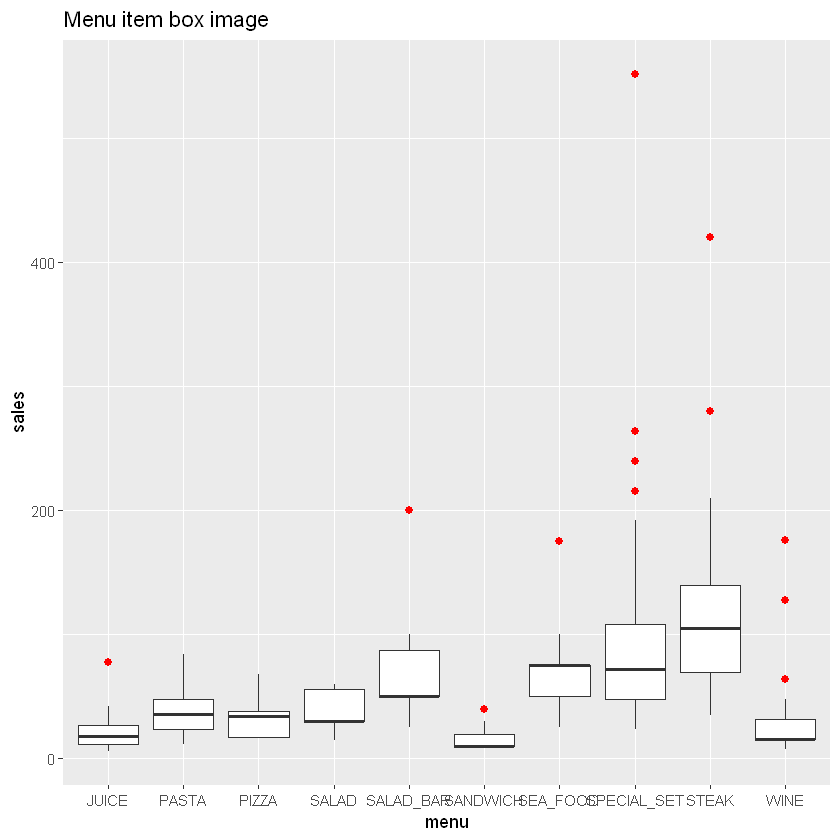

In [64]:
ggplot(df_boxplot_graph, aes(x=product_name, y = sales/1000))+
geom_boxplot(width = 0.8, outlier.size = 2, outlier.color = "red")+
labs(title = "Menu item box image", x="menu", y = "sales")